# Node classification - Real world dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("Paired", 11)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10]}


In [3]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [4]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_real.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_real_sparsity_all_avg10expe.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [5]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [6]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,true_label_as_target,hard_mask,sparsity,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,fidelity_gnn_acc-,fidelity_gnn_prob+,fidelity_gnn_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init,type
0,citeseer,False,False,0.000,basic_gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.352,0.368953,0.412799,0.994347,70.267,3.93534,12431.0,0.994347,70.267,pertubation
1,citeseer,False,False,0.000,distance,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.076,0.526973,0.252872,0.506315,6136.999,0.84974,12431.0,0.506315,6136.999,baseline
2,citeseer,False,False,0.000,gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.156,0.591046,0.442776,0.994347,70.267,3.93715,12431.0,0.994347,70.267,pertubation
3,citeseer,False,False,0.000,gradcam,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.041,0.492824,0.281771,0.846547,1907.573,0.00477,12431.0,0.846547,1907.573,gradient
4,citeseer,False,False,0.000,ig,100.0,-1.000,-1.000,-1.000000,-1.000000,...,0.045,0.549571,0.205706,0.478352,6484.608,0.33684,12431.0,0.478352,6484.608,gradient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,pubmed,True,True,0.997,occlusion,100.0,0.800,0.040,0.565159,-0.117684,...,-1.000,-1.000000,-1.000000,0.998555,156.621,2.24342,108365.0,0.996889,337.138,pertubation
636,pubmed,True,True,0.997,pagerank,100.0,0.783,0.050,0.532659,-0.107713,...,-1.000,-1.000000,-1.000000,0.997001,325.000,1.43936,108365.0,0.000016,108363.276,baseline
637,pubmed,True,True,0.997,pgmexplainer,100.0,0.694,0.047,0.462989,-0.110298,...,-1.000,-1.000000,-1.000000,0.997598,260.264,103.65112,108365.0,0.986885,1421.193,pertubation
638,pubmed,True,True,0.997,random,100.0,0.073,0.776,-0.077949,0.530579,...,-1.000,-1.000000,-1.000000,0.997001,325.000,0.00094,108365.0,0.000009,108364.000,baseline


# Explain focus: Phenomenon

true_label_as_target = True

In [9]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [10]:
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
df['charact'] = 2 * df['fidelity_prob+'] * (1-df['fidelity_prob-'])/ (df['fidelity_prob+']  + 1-df['fidelity_prob-'])


/tmp/ipykernel_6590/797567391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
/tmp/ipykernel_6590/797567391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
/tmp/ipykernel_6590/797567391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [11]:
#### Robustness ####
df_sparse = df[df['sparsity'] == 0.997]
df_dense = df[df['sparsity'] == 0]
df_sparse = df_sparse[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_dense = df_dense[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], how="outer", suffixes=["_0", "_0.997"])

df_robust["robustness"] = (df_robust["charact_0.997"]-df_robust["charact_0"])/0.997

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset,citeseer,cora,facebook,pubmed,robustness
explainer_name,,,,,
random,-0.562686,-0.578692,-0.535793,-0.574782,-0.562988
basic_gnnexplainer,-0.162566,-0.336717,-0.295958,-0.099128,-0.223592
sa,-0.066620,-0.093635,-0.212795,-0.093565,-0.116654
pgmexplainer,-0.076225,-0.162919,-0.149539,-0.046744,-0.108857
distance,-0.079074,-0.173108,-0.101578,-0.029691,-0.095863
gnnexplainer,-0.037148,-0.138123,-0.074454,-0.023243,-0.068242
ig,-0.030693,-0.081276,-0.057948,-0.018258,-0.047044
pagerank,-0.005901,-0.008386,0.000297,-0.000681,-0.003668
gradcam,-0.001813,0.000483,0.006255,0.003751,0.002169


## Hard mask

In [12]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [13]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.99]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset  explainer_name                                                 
citeseer basic_gnnexplainer            0.993379                82.303   
         distance                      0.497918              6241.379   
         gnnexplainer                  0.993379                82.303   
         gradcam                       0.880982              1479.518   
         ig                            0.540483              5712.252   
         occlusion                     0.993379                82.303   
         pagerank                      0.000103             12429.721   
         pgmexplainer                  0.985905               175.214   
         random                        0.000080             12430.000   
         sa                            0.690609              3846.041   
cora     basic_gnnexplainer            0.986937               173.262   
         distance                      0.111033             11791.253   
         gnnexplainer                  0.986937               173.262   
         gradcam                       0.824682              2325.415   
         ig                            0.292451              9384.928   
         occlusion                     0.986937               173.262   
         pagerank                      0.000076             13262.997   
         pgmexplainer                  0.971308               380.565   
         random                        0.000075             13263.000   
         sa                            0.611267              5156.150   
facebook basic_gnnexplainer            0.976042              8723.594   
         distance                      0.000029            364105.508   
         gnnexplainer                  0.976042              8723.594   
         gradcam                       0.627008            135812.437   
         ig                            0.053931            344478.766   
         occlusion                     0.976042              8723.594   
         pagerank                      0.000003            364114.994   
         pgmexplainer                  0.946093             19628.466   
         random                        0.000003            364115.000   
         sa                            0.232798            279350.520   
pubmed   basic_gnnexplainer            0.996889               337.138   
         distance                      0.000076            108356.810   
         gnnexplainer                  0.996889               337.138   
         gradcam                       0.784098             23396.204   
         ig                            0.142725             92898.641   
         occlusion                     0.996889               337.138   
         pagerank                      0.000016            108363.276   
         pgmexplainer                  0.986885              1421.193   
         random                        0.000009            108364.000   
         sa                            0.438952             60798.016   

                             number_of_edges       time  fidelity_prob+  \
dataset  explainer_name                                                   
citeseer basic_gnnexplainer          12431.0    3.99539        0.612290   
         distance                    12431.0    0.88600        0.670058   
         gnnexplainer                12431.0    4.04080        0.673560   
         gradcam                     12431.0    0.00501        0.709288   
         ig                          12431.0    0.31033        0.705187   
         occlusion                   12431.0    0.94593        0.714996   
         pagerank                    12431.0    0.87230        0.707755   
         pgmexplainer                12431.0   22.84703        0.658477   
         random                      12431.0    0.00020       -0.016964   
         sa                          12431.0    0.04148        0.561423   
cora     basic_gnnexplainer          13264.0    3.83742       

In [14]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset,citeseer,cora,facebook,pubmed,mean_sparsity
explainer_name,,,,,
random,0.000080,0.000075,0.000003,0.000009,0.000042
pagerank,0.000103,0.000076,0.000003,0.000016,0.000049
distance,0.497918,0.111033,0.000029,0.000076,0.152264
ig,0.540483,0.292451,0.053931,0.142725,0.257398
sa,0.690609,0.611267,0.232798,0.438952,0.493406
gradcam,0.880982,0.824682,0.627008,0.784098,0.779192
pgmexplainer,0.985905,0.971308,0.946093,0.986885,0.972548
basic_gnnexplainer,0.993379,0.986937,0.976042,0.996889,0.988312
gnnexplainer,0.993379,0.986937,0.976042,0.996889,0.988312


In [15]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset,citeseer,cora,facebook,pubmed,mean_time
explainer_name,,,,,
random,0.00020,0.00020,0.00286,0.00098,0.001060
gradcam,0.00501,0.00482,0.01008,0.00684,0.006687
sa,0.04148,0.00738,0.01217,0.03085,0.022970
ig,0.31033,0.15768,0.24879,0.29159,0.252097
distance,0.88600,0.28227,1.75010,1.27237,1.047685
pagerank,0.87230,0.29930,2.45916,1.46923,1.274998
basic_gnnexplainer,3.99539,3.83742,3.72980,3.63326,3.798967
gnnexplainer,4.04080,3.80370,4.00284,3.86068,3.927005
occlusion,0.94593,0.56181,25.11196,2.32620,7.236475


In [16]:
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,-0.035978,-0.011718,0.013897,-0.182565,-0.054091
sa,0.706620,0.713182,0.330726,0.206498,0.489257
basic_gnnexplainer,0.776861,0.718268,0.653530,0.673052,0.705428
gnnexplainer,0.839705,0.777646,0.732715,0.721027,0.767773
pgmexplainer,0.821051,0.823718,0.726809,0.707790,0.769842
distance,0.829772,0.840295,0.791244,0.716505,0.794454
ig,0.859446,0.844035,0.810686,0.728914,0.810770
pagerank,0.856624,0.882034,0.828364,0.719574,0.821649
gradcam,0.863399,0.896257,0.841513,0.727733,0.832225


In [17]:
#### Average characterization power for Cora according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.870500,0.097324,-0.011718,-0.019488,0.234154
basic_gnnexplainer,0.881846,0.881846,0.718268,0.453412,0.733843
sa,0.818591,0.717196,0.713182,0.694259,0.735807
gnnexplainer,0.895083,0.895385,0.777646,0.620396,0.797128
pgmexplainer,0.882132,0.882132,0.823718,0.682622,0.817651
distance,0.881846,0.881846,0.840295,0.679953,0.820985
ig,0.886003,0.897169,0.844035,0.781009,0.852054
pagerank,0.881846,0.881846,0.882034,0.881569,0.881824
occlusion,0.881846,0.881846,0.893269,0.907063,0.891006


### Analysis after mask tranformation

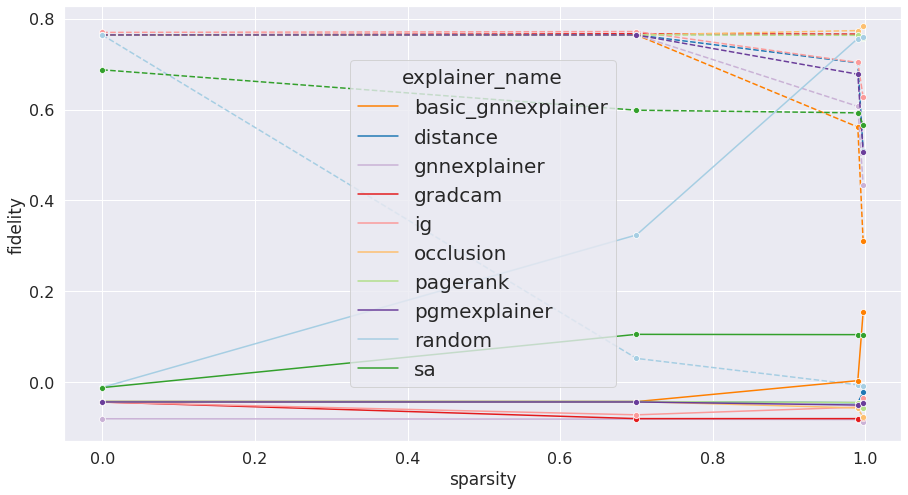

In [18]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

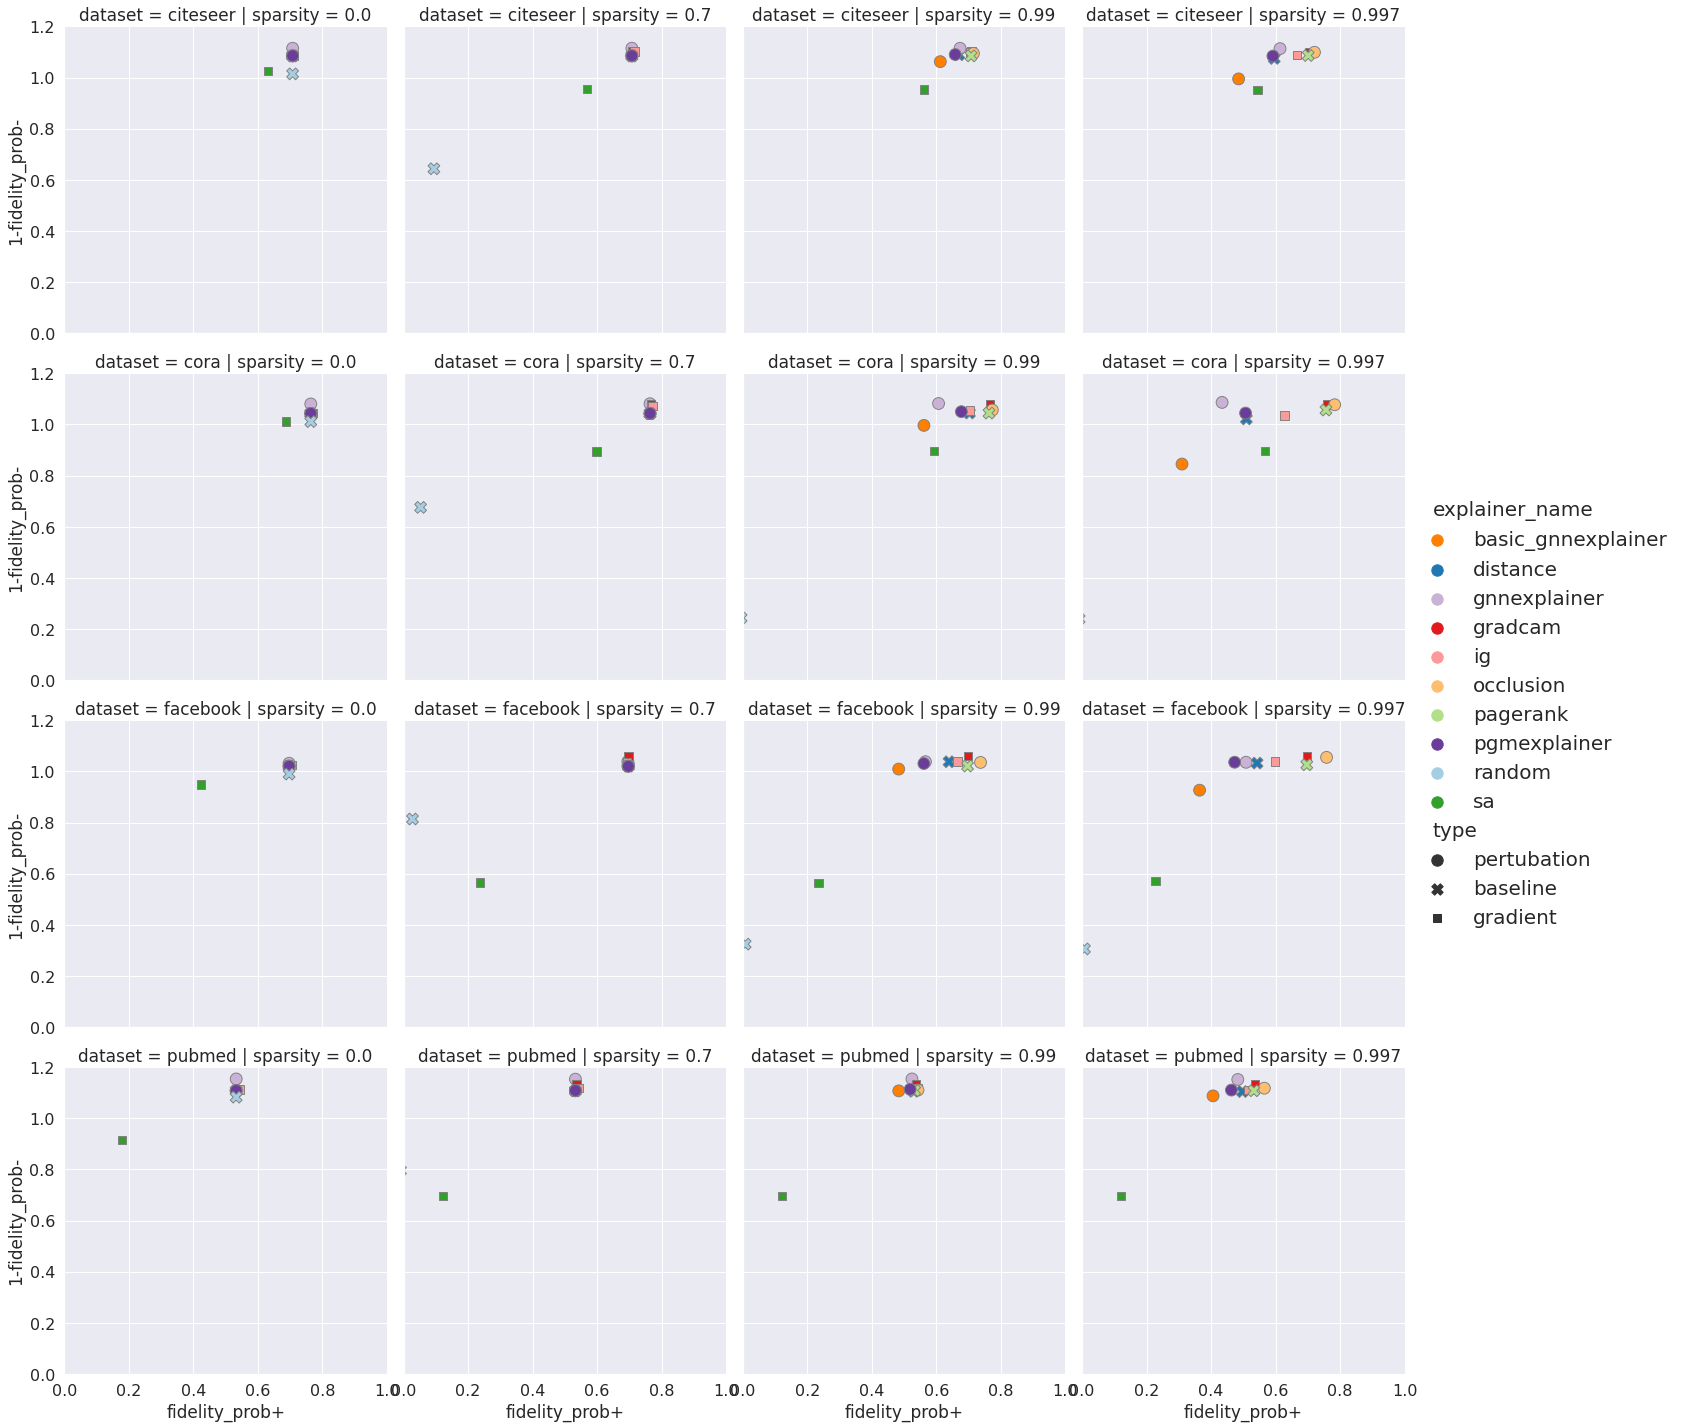

In [19]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
    data=df_hard,
    x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
    hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
)
plt.xlim(0, 1)
plt.ylim(0, 1.2)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 
    

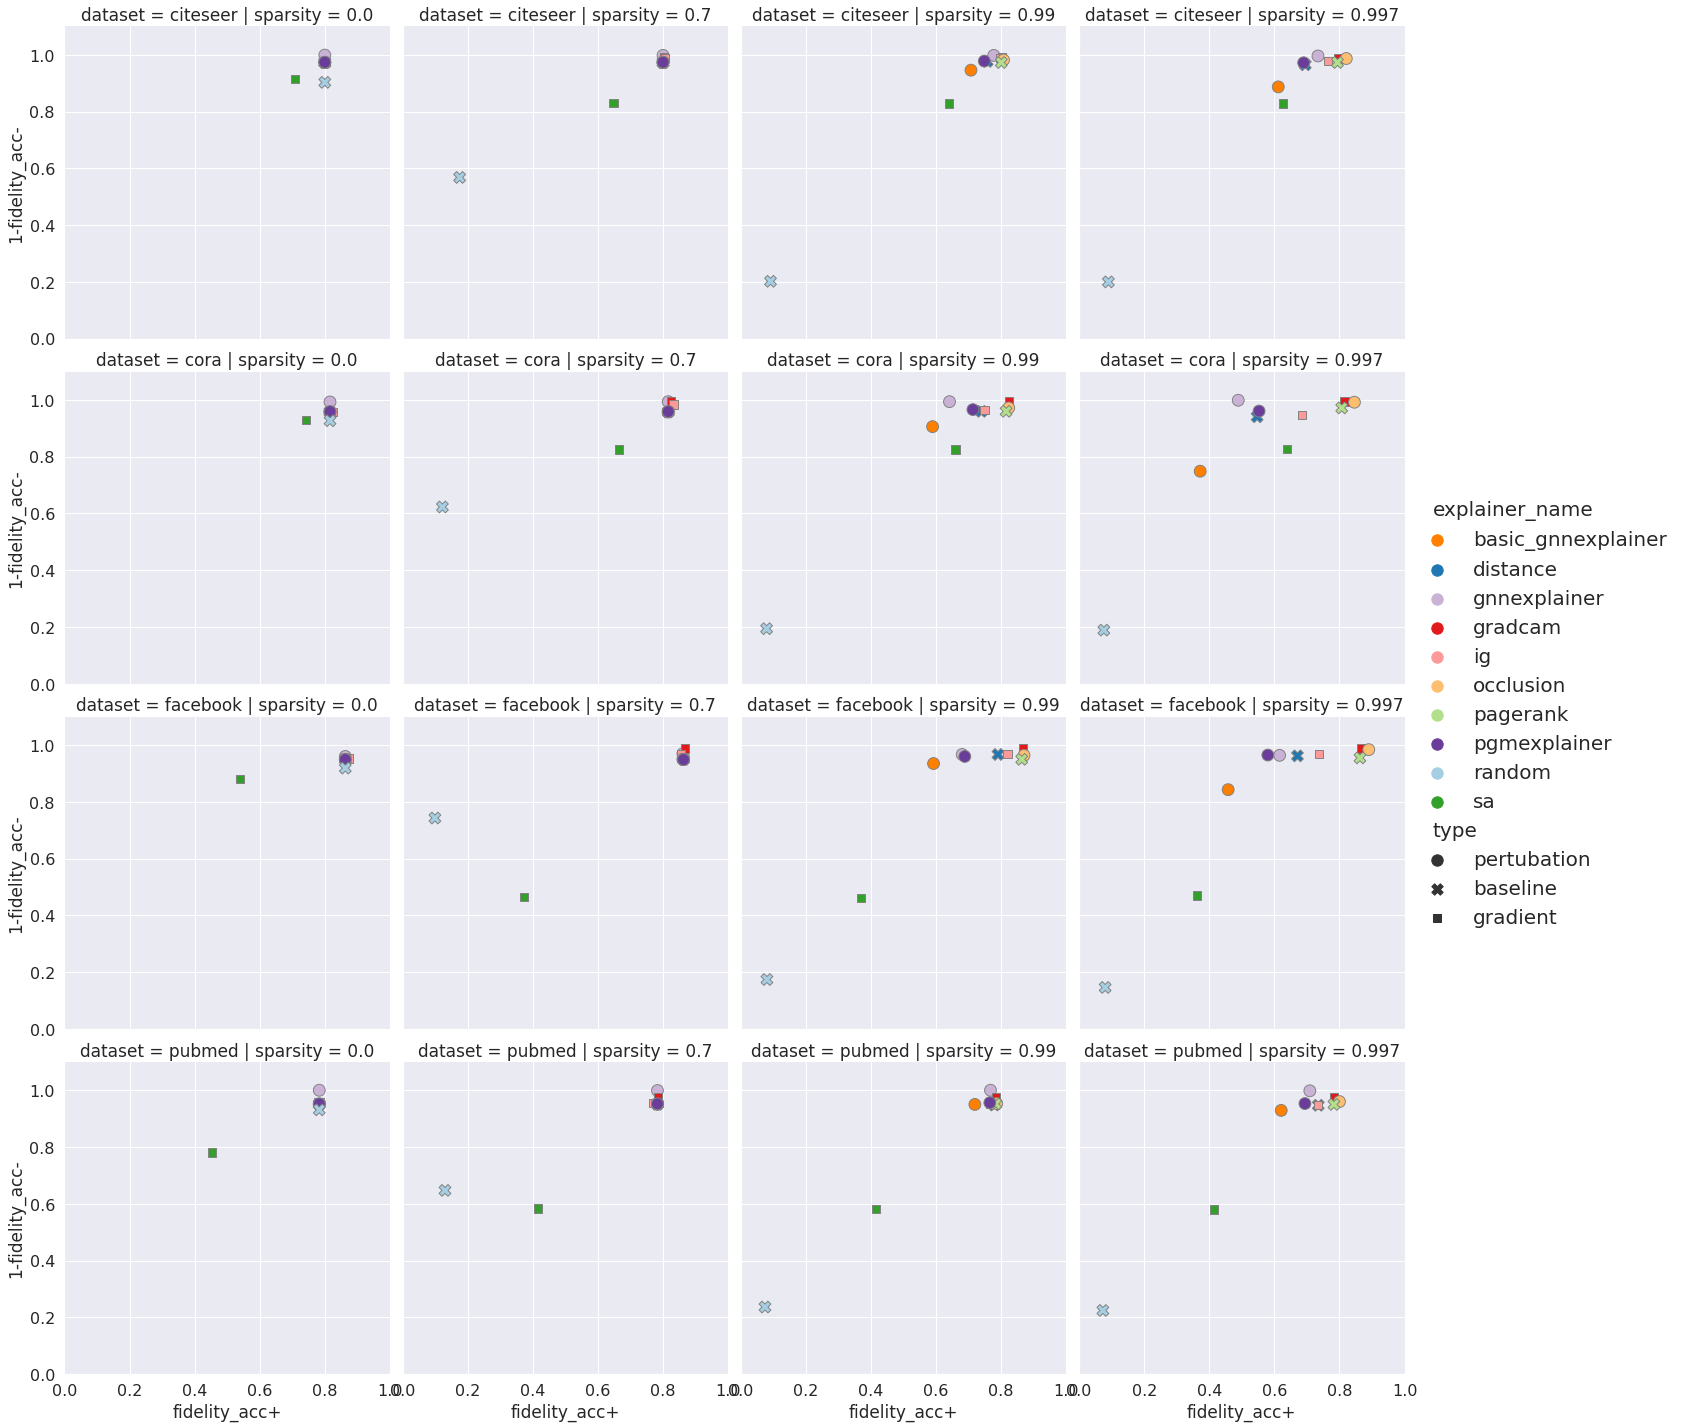

In [20]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 


## Soft mask

In [21]:
df_soft = df[df.hard_mask==False]

In [22]:
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.99]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.246662,0.215966,0.237269,0.241606,0.235376
basic_gnnexplainer,0.404923,0.359111,0.531555,0.430095,0.431421
gnnexplainer,0.581824,0.441321,0.303600,0.493784,0.455132
sa,0.646031,0.633325,0.289443,0.256053,0.456213
distance,0.616159,0.567569,0.381274,0.485416,0.512605
gradcam,0.593895,0.554466,0.412420,0.510414,0.517799
pagerank,0.678167,0.631612,0.423063,0.544627,0.569367
ig,0.671144,0.629435,0.476018,0.543324,0.579980
pgmexplainer,0.778956,0.736300,0.665485,0.642825,0.705891


In [23]:
#### Average characterization power for Cora according to sparsity ####
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
res_init = df1[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.475516,0.333159,0.215966,0.211593,0.309059
basic_gnnexplainer,0.474769,0.472316,0.359111,0.231790,0.384497
gnnexplainer,0.443176,0.442550,0.441321,0.442445,0.442373
gradcam,0.555775,0.556328,0.554466,0.547456,0.553506
distance,0.616878,0.616878,0.567569,0.473593,0.568730
pagerank,0.636269,0.636269,0.631612,0.619826,0.630994
ig,0.653196,0.652571,0.629435,0.596126,0.632832
sa,0.678006,0.639143,0.633325,0.615628,0.641526
pgmexplainer,0.775446,0.775446,0.736300,0.650094,0.734321


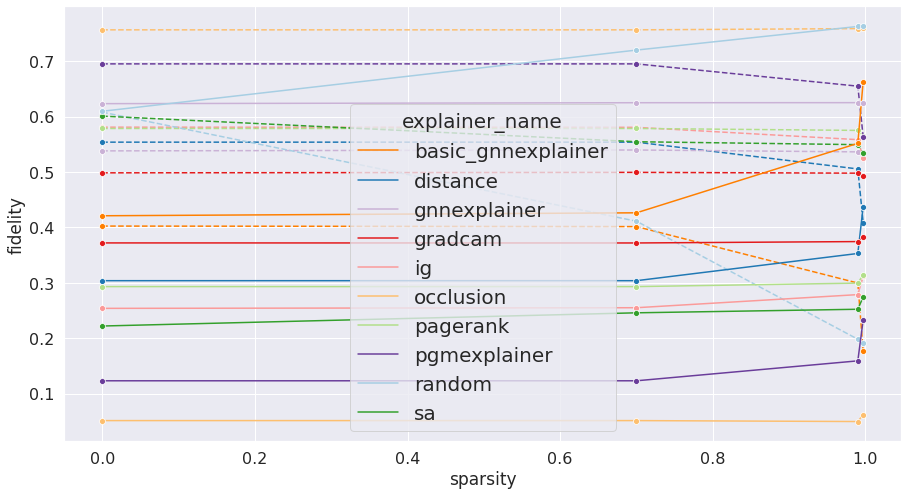

In [24]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

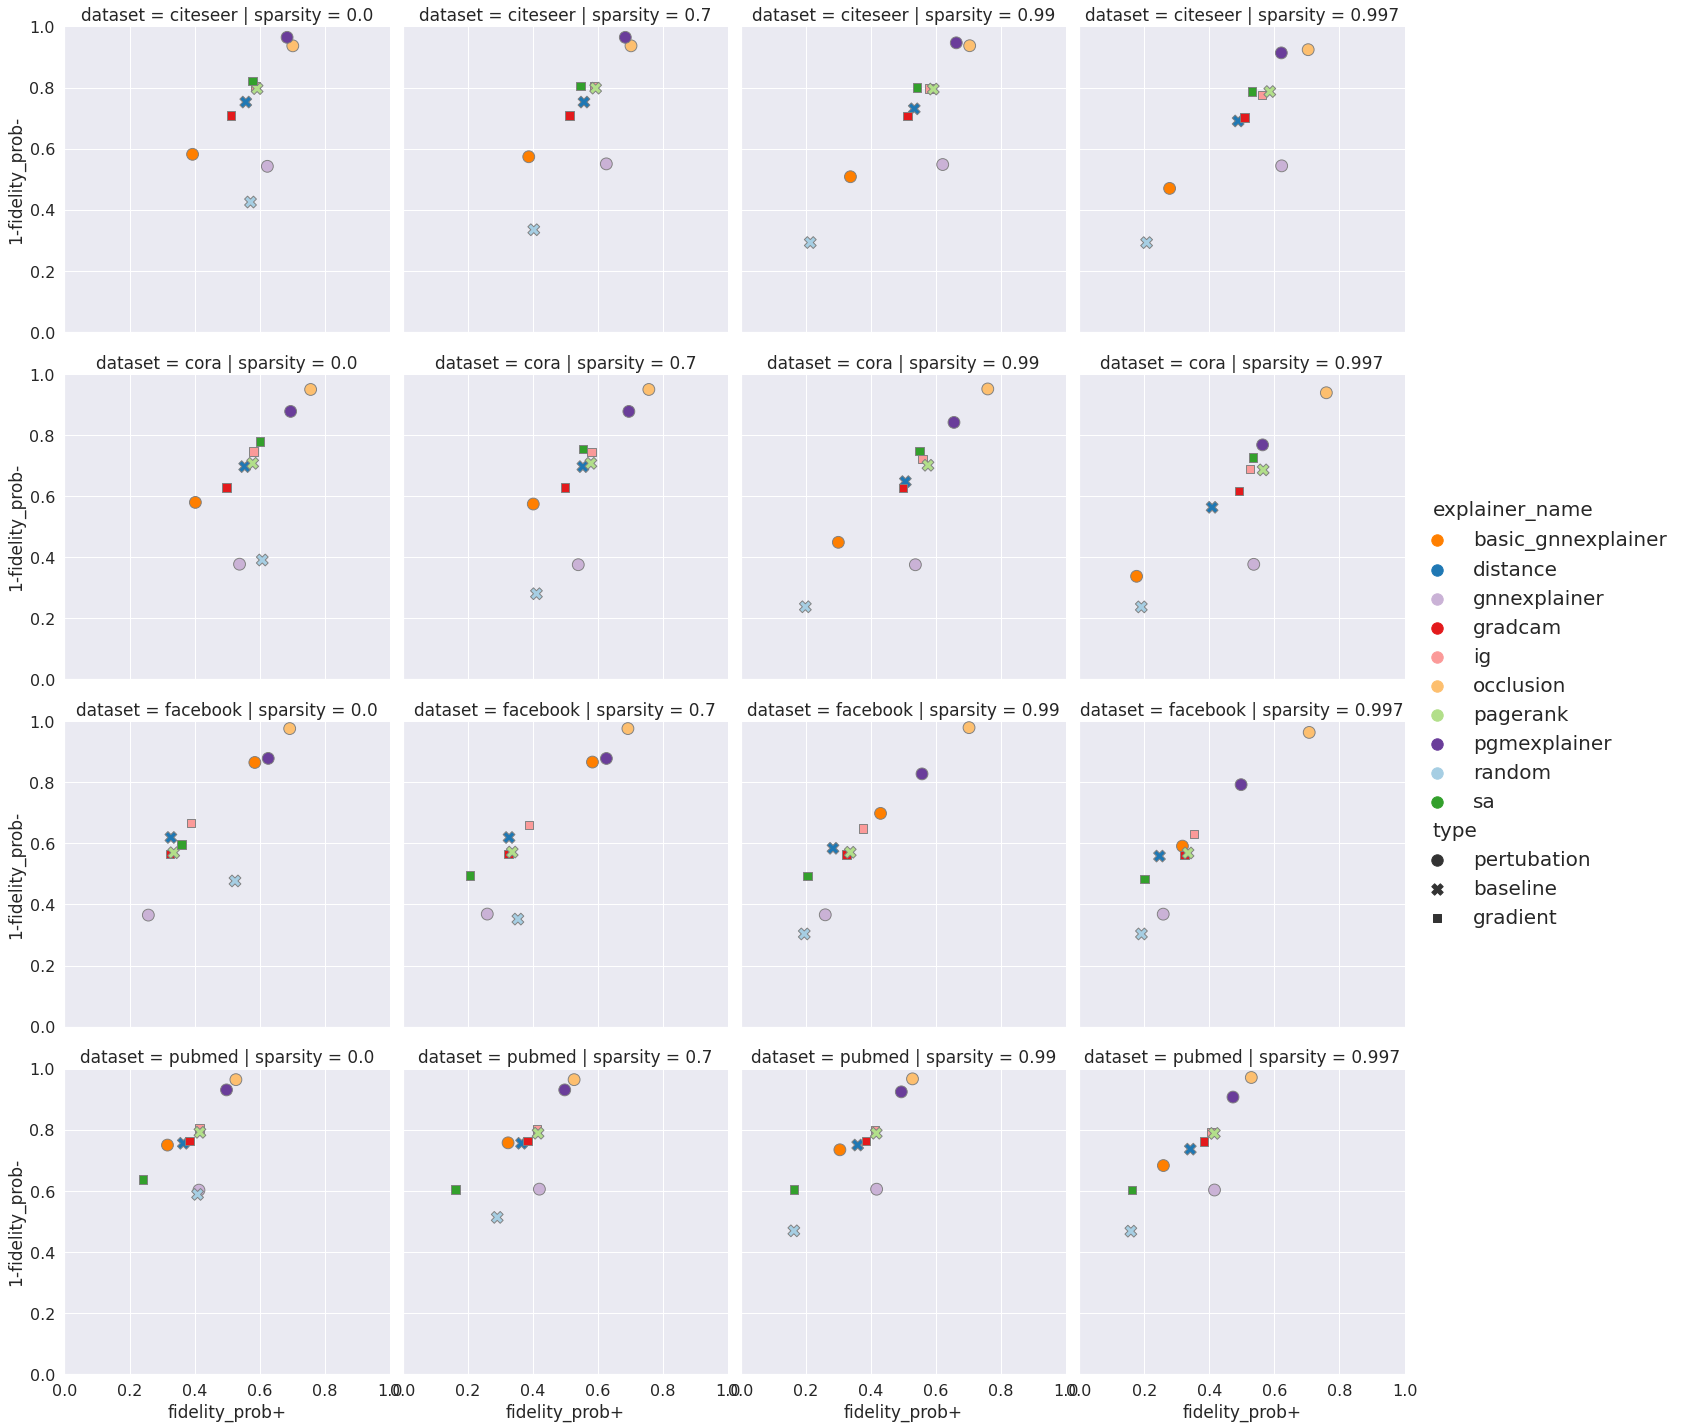

In [25]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

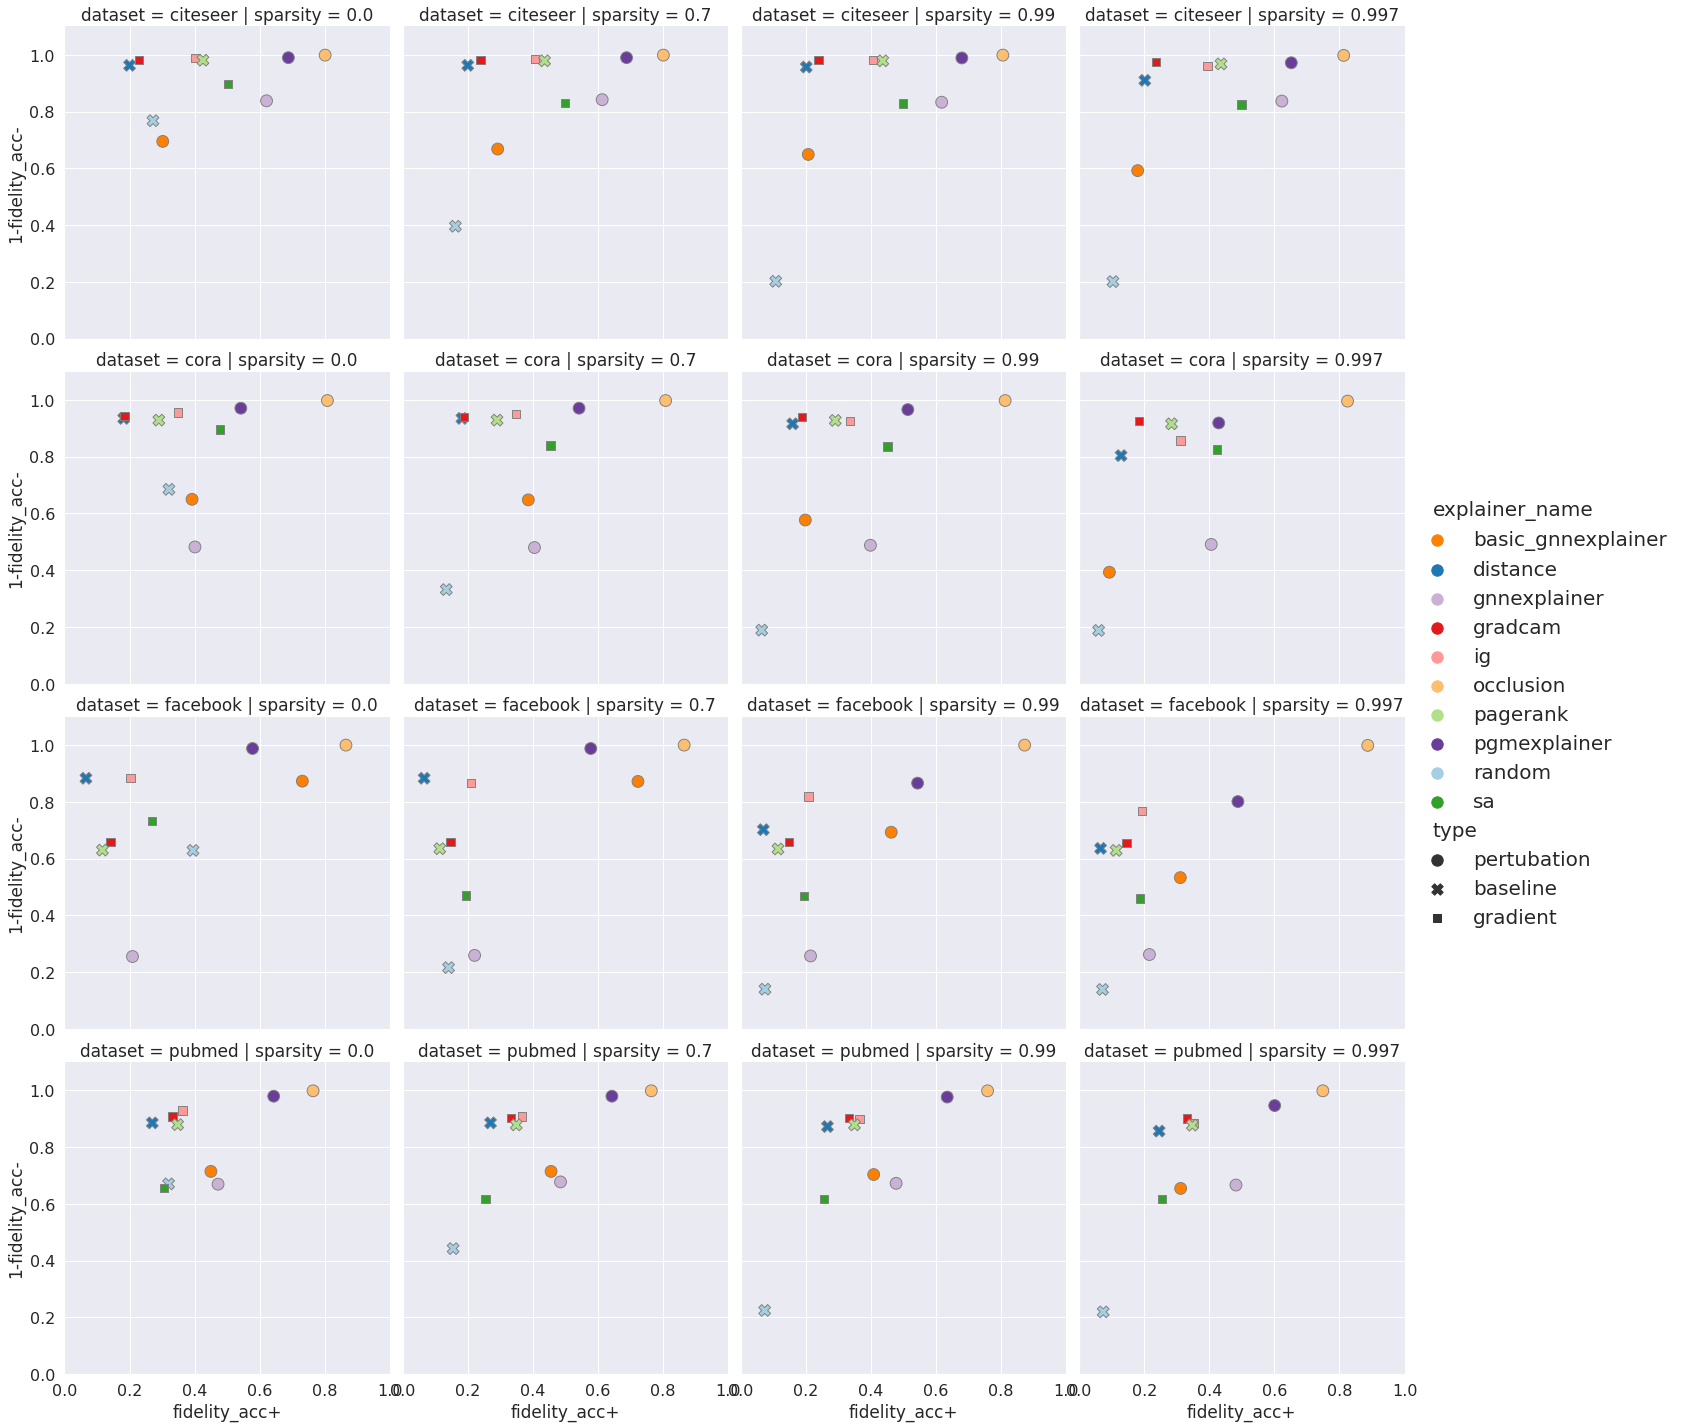

In [26]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Explain focus: GNN model

true_label_as_target = False

In [27]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False].reset_index()

In [28]:
df_gnn["1-fidelity_gnn_acc-"] = 1- df_gnn["fidelity_gnn_acc-"]
df_gnn["1-fidelity_gnn_prob-"] = 1- df_gnn["fidelity_gnn_prob-"]
df_gnn['charact'] = 2 * df_gnn['fidelity_gnn_prob+'] * (1-df_gnn['fidelity_gnn_prob-'])/ (df_gnn['fidelity_gnn_prob+']  + 1-df_gnn['fidelity_gnn_prob-'])


## Hard mask

In [29]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [30]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.313041,0.282687,0.246943,0.315667,0.289584
sa,0.644598,0.694838,0.413187,0.360550,0.528293
gnnexplainer,0.734857,0.785048,0.771389,0.625128,0.729105
basic_gnnexplainer,0.743357,0.785230,0.771124,0.625778,0.731372
occlusion,0.743357,0.785230,0.771124,0.625778,0.731372
distance,0.743357,0.785230,0.771124,0.625778,0.731372
pagerank,0.743357,0.785230,0.771124,0.625778,0.731372
pgmexplainer,0.743244,0.785805,0.771124,0.625778,0.731488
gradcam,0.744136,0.789606,0.781078,0.635345,0.737541


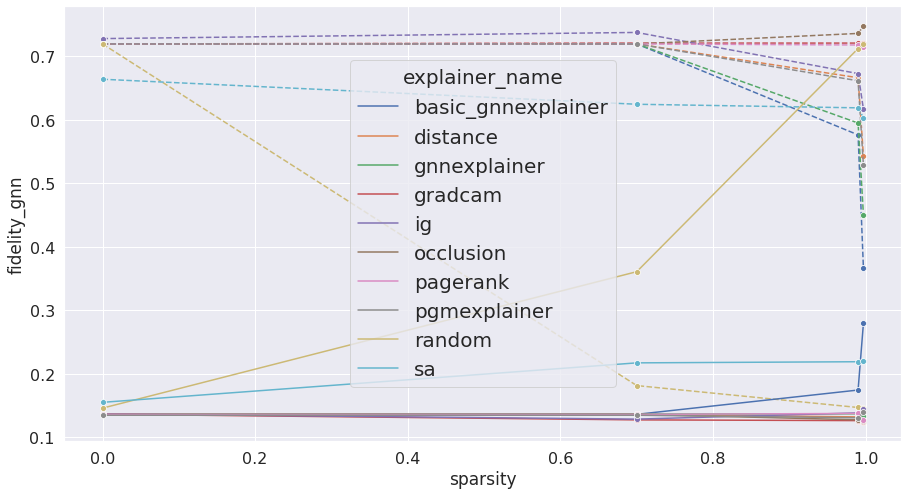

In [31]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

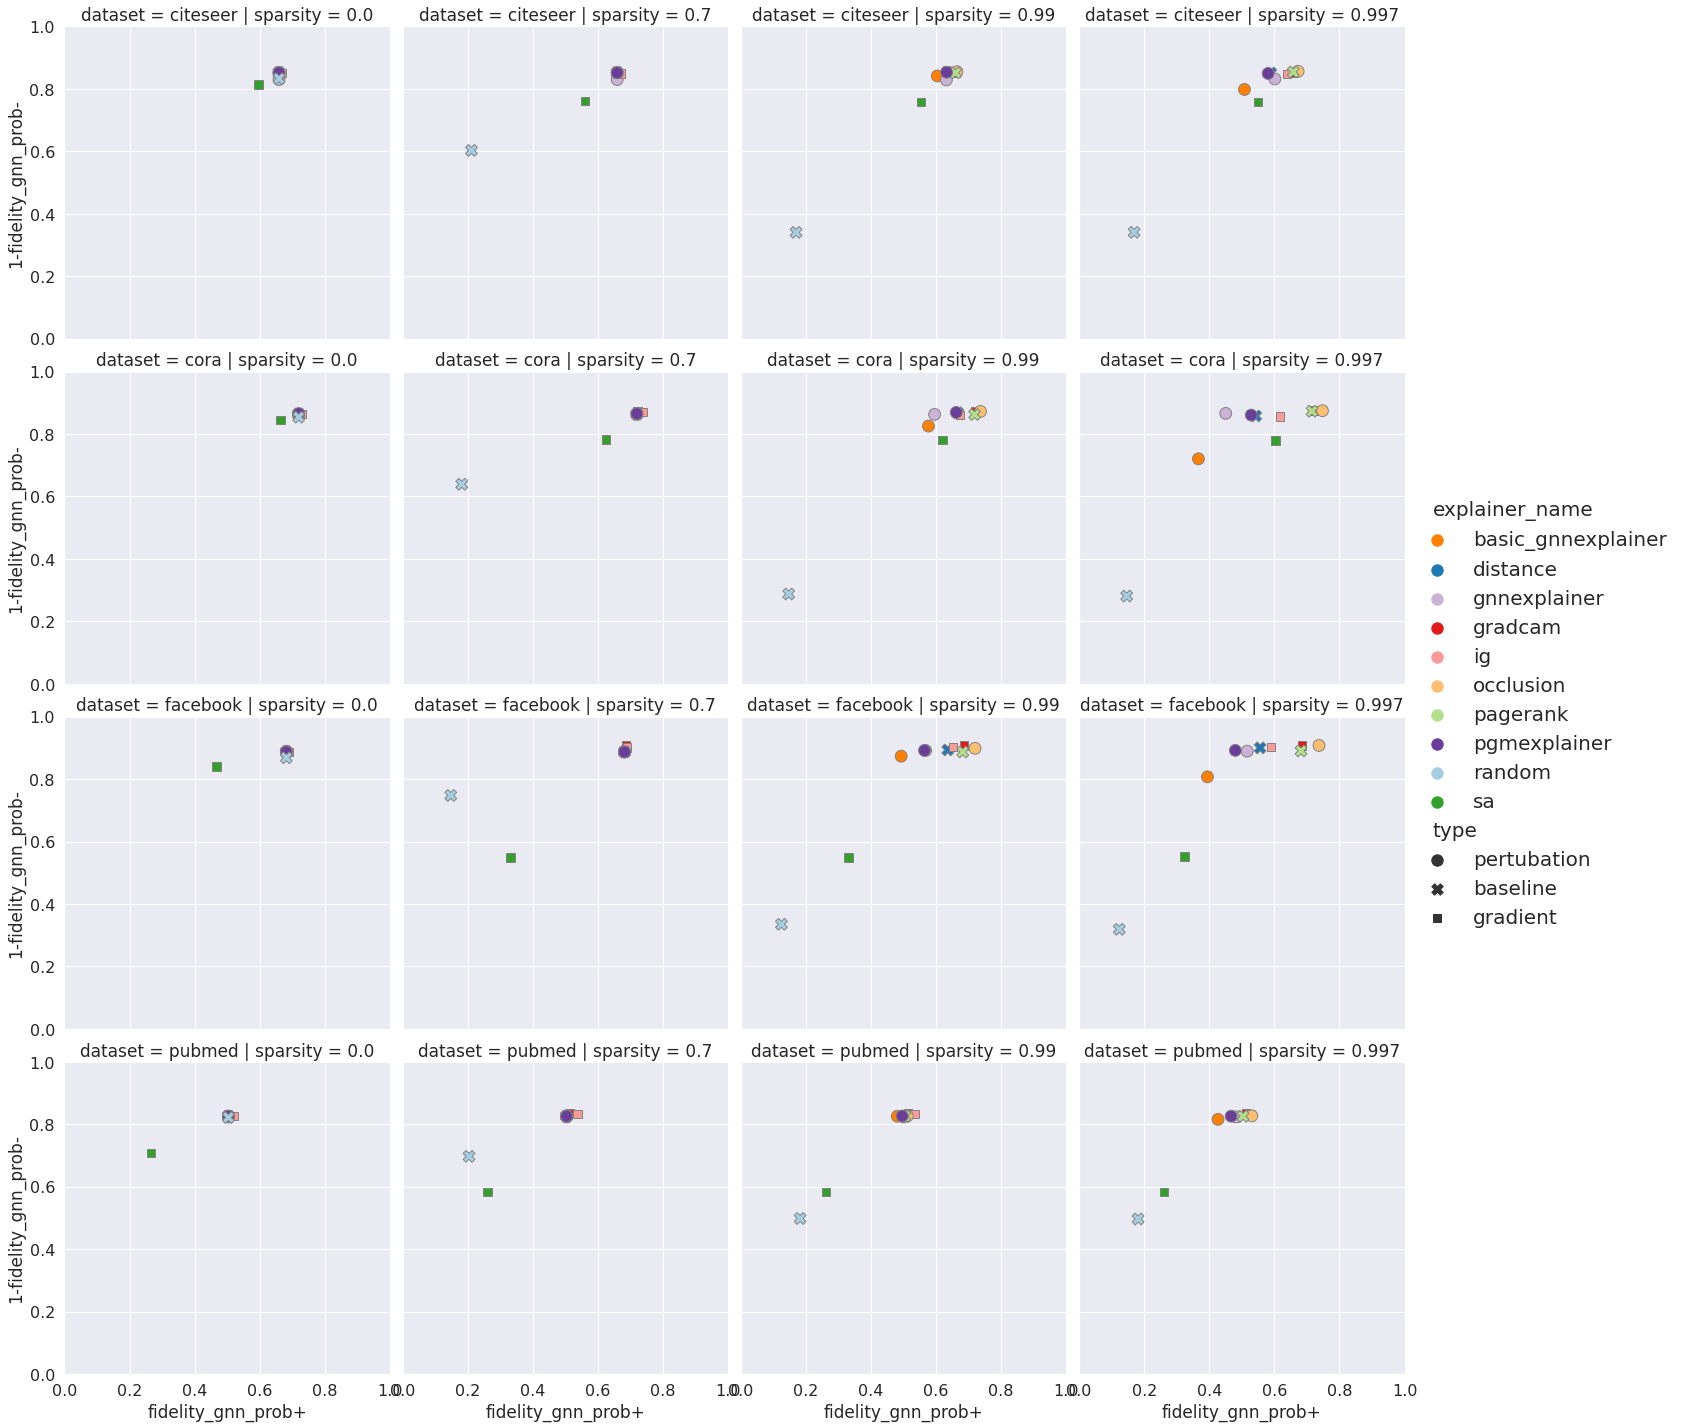

In [32]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

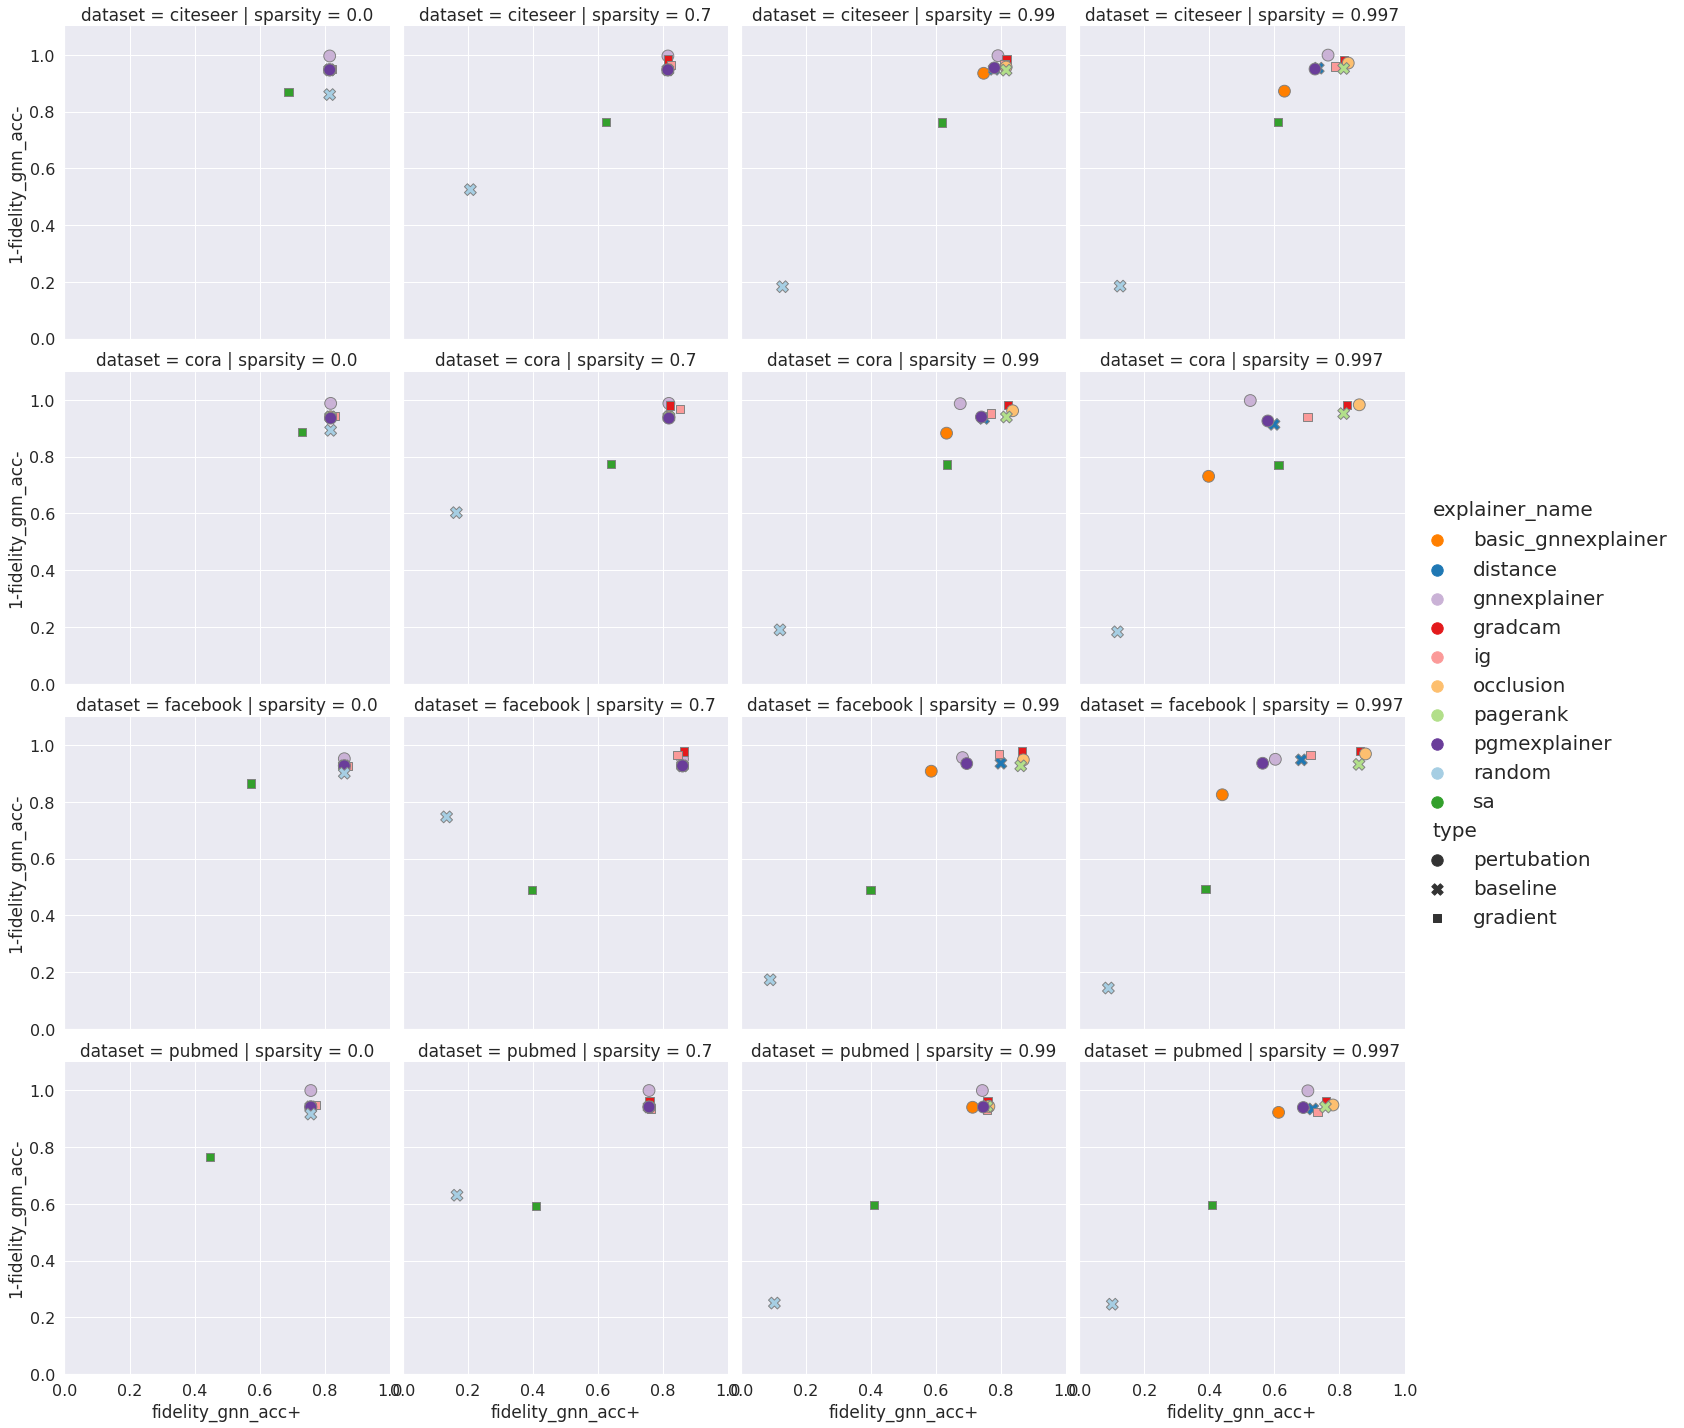

In [33]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

## Soft mask

In [34]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [35]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.385725,0.355987,0.358685,0.371773,0.368042
sa,0.597873,0.607544,0.297810,0.253046,0.439068
gnnexplainer,0.577524,0.459764,0.308645,0.486423,0.458089
gradcam,0.584354,0.555257,0.406019,0.496785,0.510604
basic_gnnexplainer,0.448360,0.464199,0.707206,0.447129,0.516723
distance,0.618030,0.600432,0.422038,0.480247,0.530187
pagerank,0.661117,0.622888,0.413093,0.529788,0.556722
ig,0.649084,0.630845,0.480648,0.527876,0.572113
pgmexplainer,0.763882,0.755579,0.721810,0.625842,0.716778


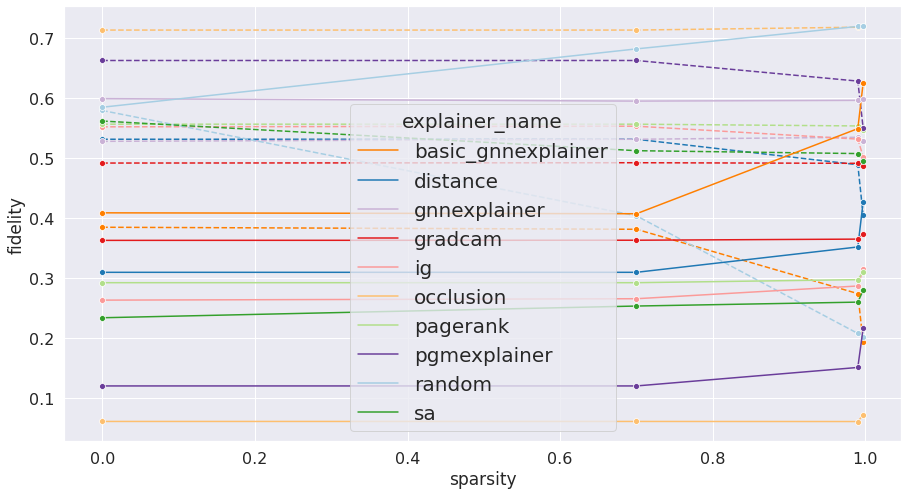

In [36]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

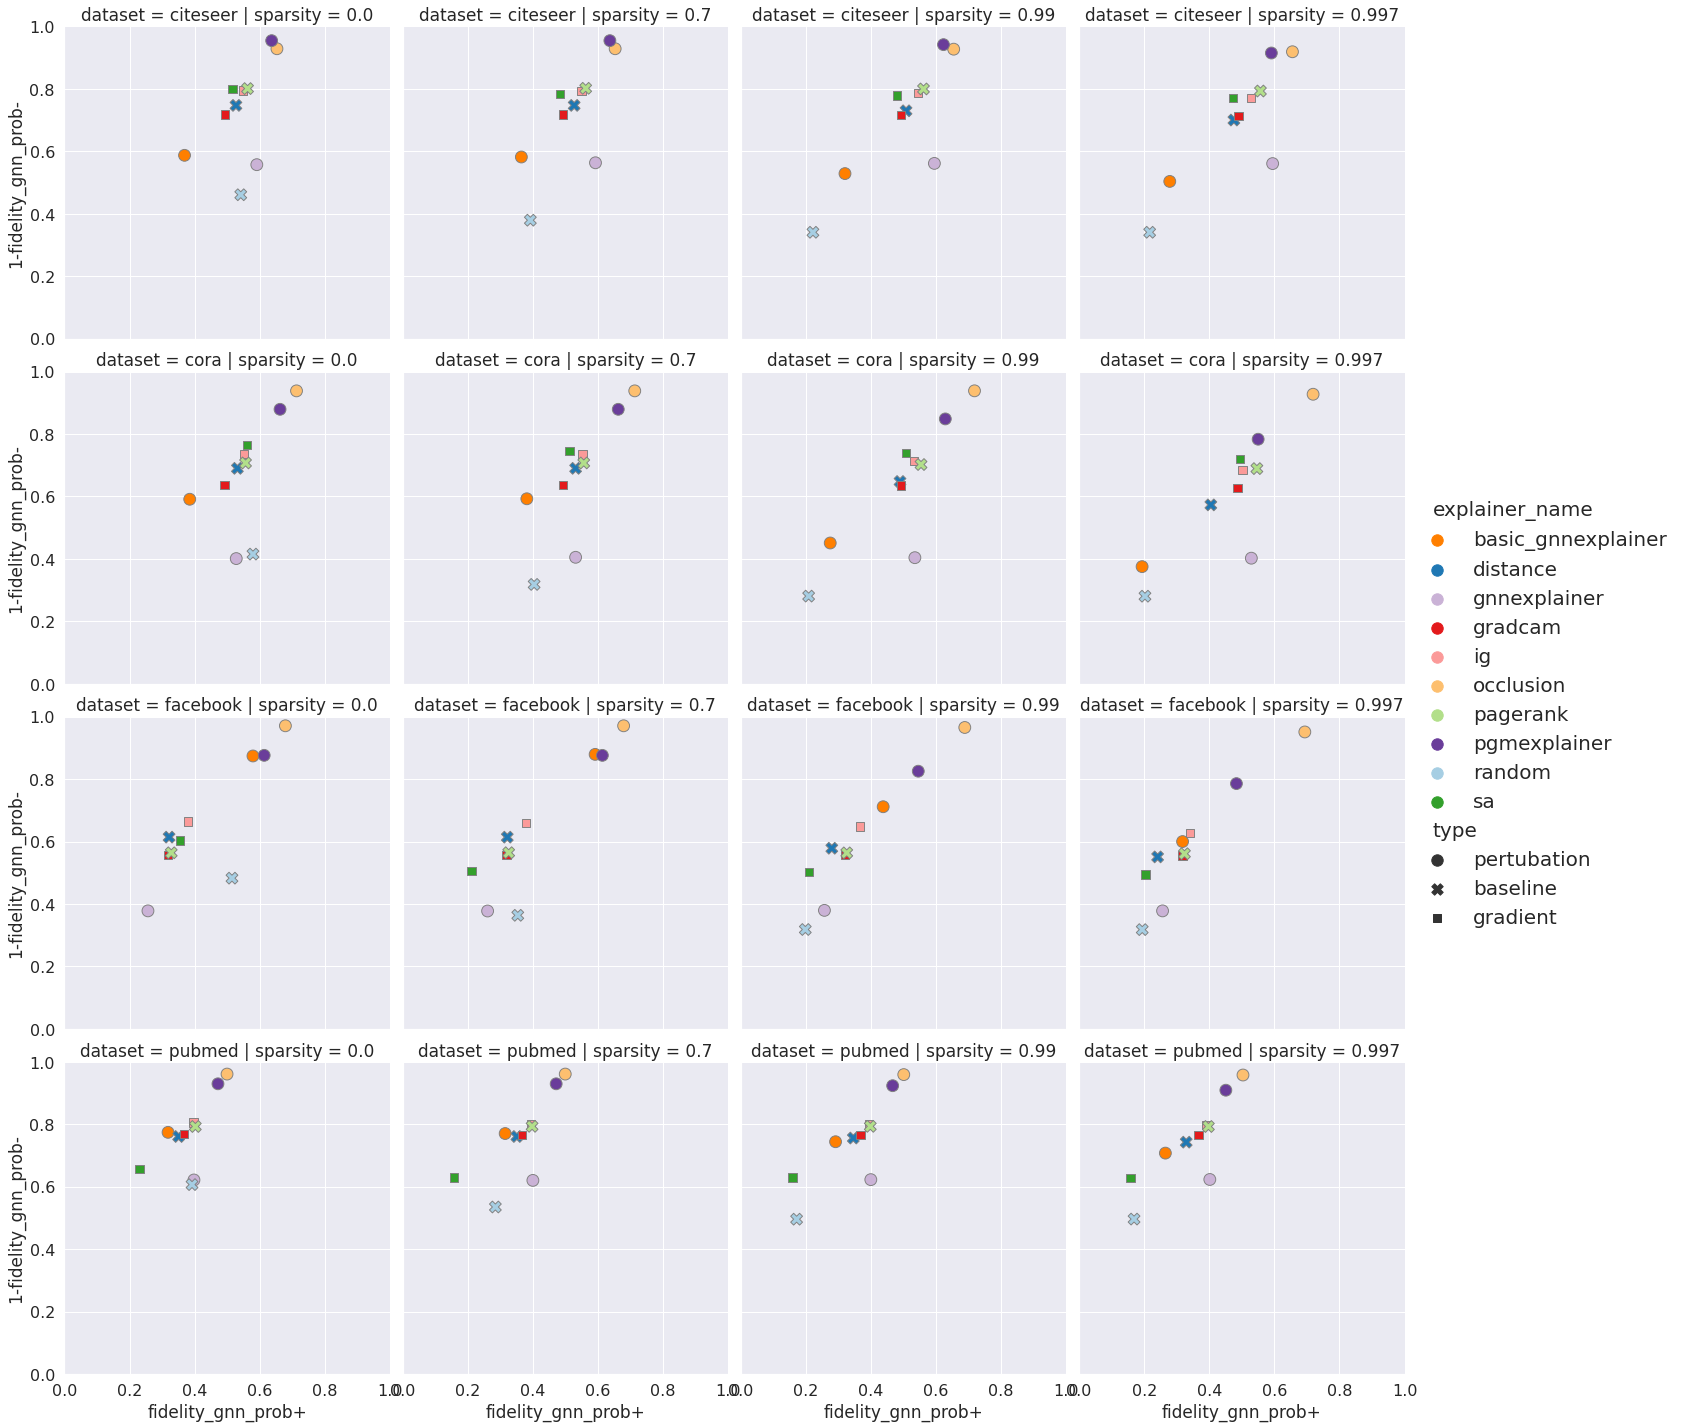

In [37]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

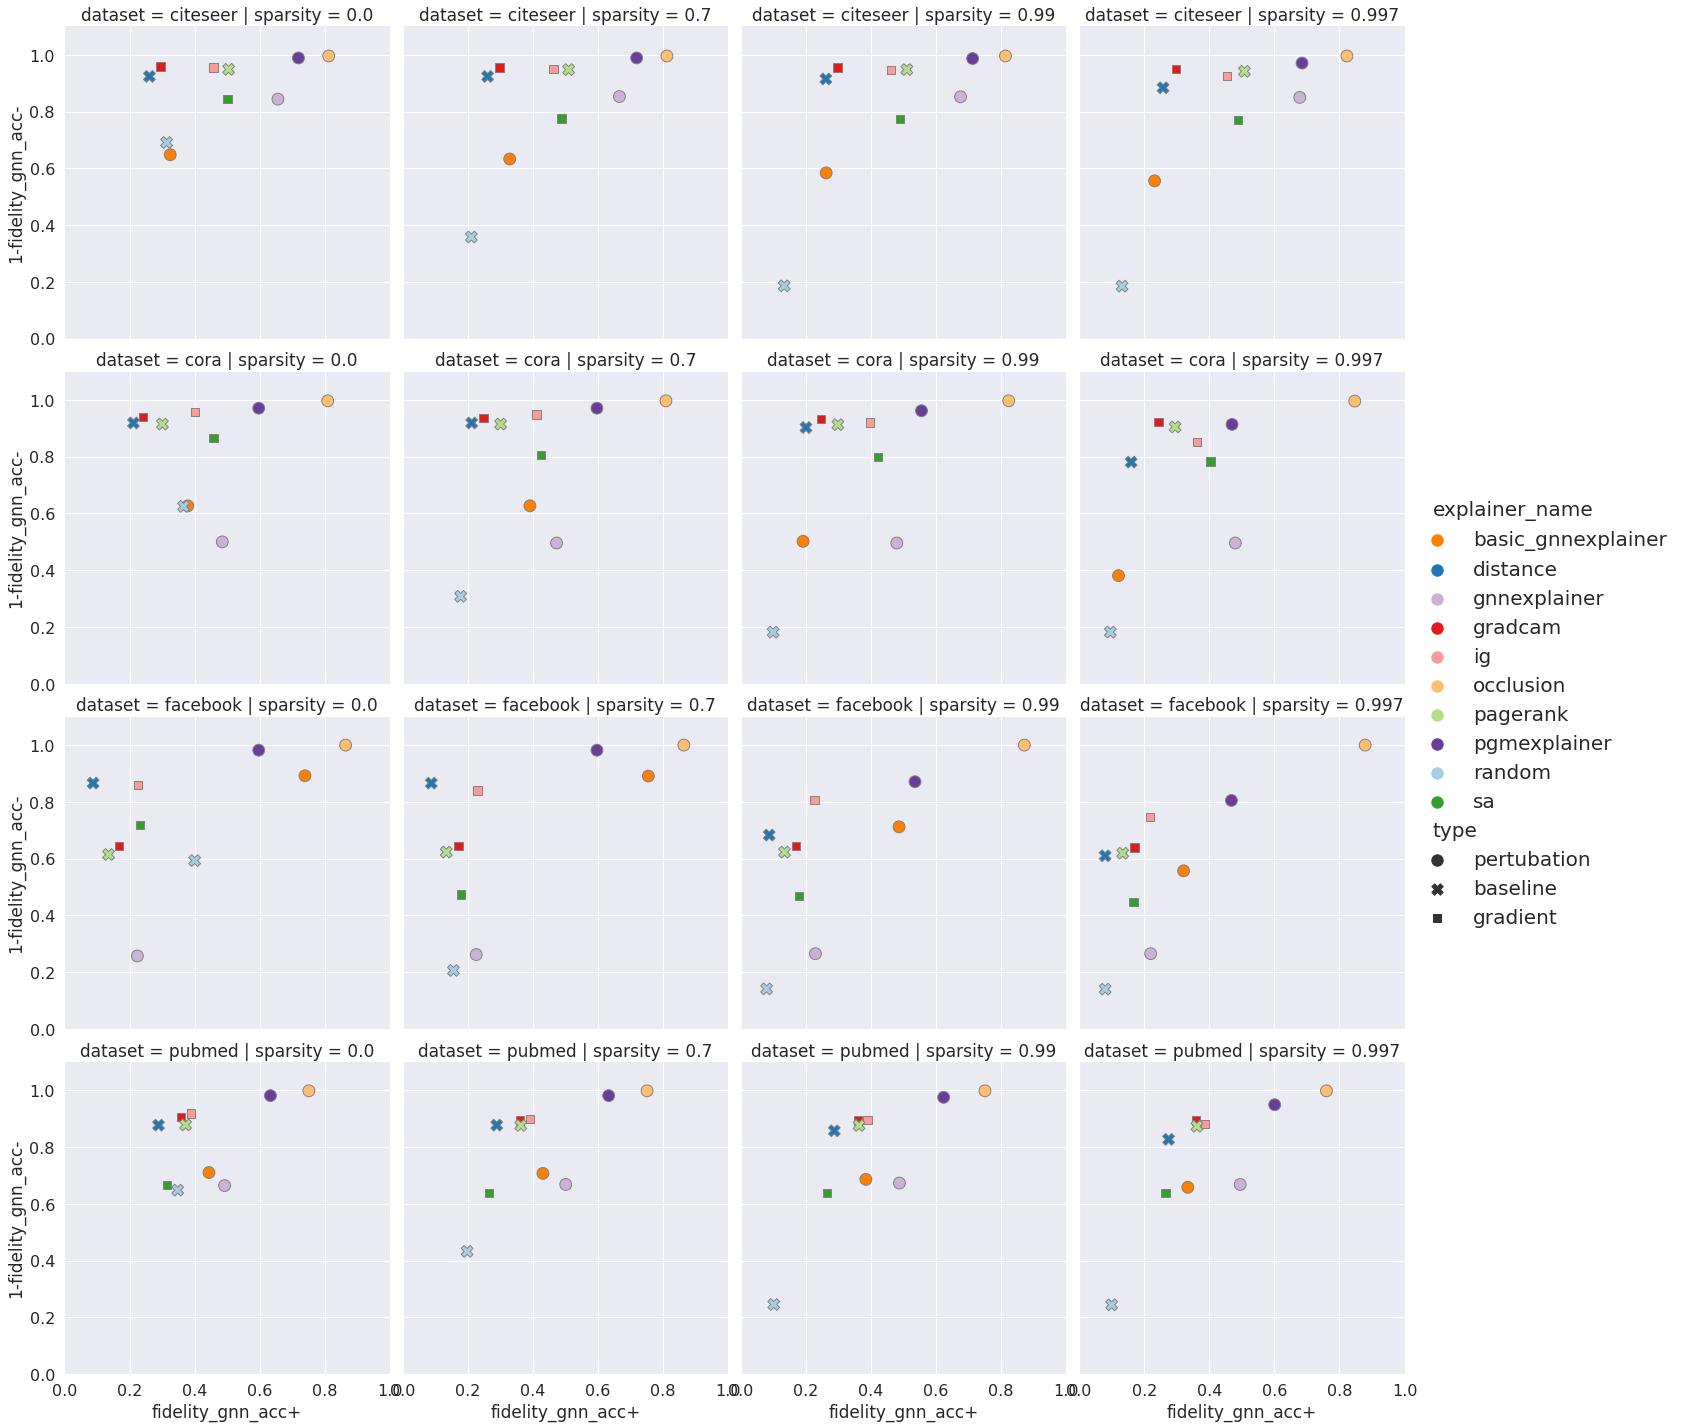

In [38]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Characterization Summary

In [7]:
sparsity = 0.997
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.sparsity==sparsity]
    res_init = df_small[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
    df_char['charact'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact"]]
    dfs.append(c)
    

    

NameError: name 'df_hard' is not defined

In [52]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [53]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary = summary.sort_values(by=['charact_phen_soft', 'charact_phen_hard'])
summary

,explainer_name,charact_phen_hard,charact_phen_soft,charact_gnn_hard,charact_gnn_soft
8,random,-0.058886,0.231624,0.215521,0.248262
0,basic_gnnexplainer,0.555066,0.342443,0.549364,0.353872
9,sa,0.479809,0.447273,0.521388,0.428409
2,gnnexplainer,0.693510,0.454690,0.638491,0.457107
1,distance,0.710968,0.463816,0.664608,0.458154
3,gradcam,0.829602,0.514632,0.737740,0.507341
4,ig,0.767916,0.559482,0.700629,0.542888
6,pagerank,0.820825,0.564279,0.731969,0.551020
7,pgmexplainer,0.687818,0.655678,0.641512,0.641453
5,occlusion,0.852615,0.784774,0.755008,0.759403


In [54]:
summary.to_csv(f'/cluster/home/kamara/Explain/csv/node_classification/real/summary/charact_summary_avg10expe_{sparsity}.csv')